<a href="https://colab.research.google.com/github/felipepizzinato/ml_porto_seguro/blob/main/challenge_ml2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/dataset_problemas_carros4.csv')

# Verificar as primeiras linhas do DataFrame
print(df.head())

          Diagnóstico                                            Sintoma
0  PROBLEMAS DE MOTOR                 O carro não liga ao girar a chave.
1  PROBLEMAS DE MOTOR     Não escuto nenhum som ao tentar ligar o motor.
2  PROBLEMAS DE MOTOR  As luzes do painel acendem, mas o motor não dá...
3  PROBLEMAS DE MOTOR  O motor faz um barulho de cliques ao tentar li...
4  PROBLEMAS DE MOTOR  O carro apresenta dificuldade para dar a partida.


In [ ]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
nltk.download('stopwords')

# Função de pré-processamento
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()
    # Remover pontuação
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remover stopwords
    stop_words = set(stopwords.words('portuguese'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Aplicar pré-processamento nas frases
df['Sintoma'] = df['Sintoma'].apply(preprocess_text)

# Exibir o DataFrame após o pré-processamento
print(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


                       Diagnóstico  \
0               PROBLEMAS DE MOTOR   
1               PROBLEMAS DE MOTOR   
2               PROBLEMAS DE MOTOR   
3               PROBLEMAS DE MOTOR   
4               PROBLEMAS DE MOTOR   
..                             ...   
897  PROBLEMAS COM AR CONDICIONADO   
898  PROBLEMAS COM AR CONDICIONADO   
899  PROBLEMAS COM AR CONDICIONADO   
900  PROBLEMAS COM AR CONDICIONADO   
901  PROBLEMAS COM AR CONDICIONADO   

                                              Sintoma  
0                              carro liga girar chave  
1                escuto nenhum som tentar ligar motor  
2               luzes painel acendem motor dá partida  
3              motor faz barulho cliques tentar ligar  
4             carro apresenta dificuldade dar partida  
..                                                ...  
897        carro superaquecendo arcondicionado ligado  
898         arcondicionado faz barulho estalo ativado  
899   sinto arcondicionado filtrando ar

In [ ]:
# Vetorização
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Sintoma'])
y = df['Diagnóstico']

# Exibir a forma da matriz de recursos
print(X.shape)


(902, 817)


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir os dados em conjuntos de treinamento e teste
# Dividir os dados em conjuntos de treinamento e teste com 75% para treinamento e 25% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Exibir as formas dos conjuntos
print("Forma do conjunto de treinamento:", X_train.shape)
print("Forma do conjunto de teste:", X_test.shape)

Forma do conjunto de treinamento: (766, 817)
Forma do conjunto de teste: (136, 817)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Criar o modelo
model = RandomForestClassifier(random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Relatório de Classificação:
                                    precision    recall  f1-score   support

     PROBLEMAS COM AR CONDICIONADO       0.88      0.94      0.91        16
             PROBLEMAS COM BATERIA       0.86      0.86      0.86        14
               PROBLEMAS COM FREIO       1.00      1.00      1.00        15
            PROBLEMAS COM OS PNEUS       1.00      0.84      0.91        19
                PROBLEMAS DE MOTOR       0.71      0.71      0.71        17
PROBLEMAS DE SISTEMA ARREFECIMENTO       0.84      0.76      0.80        21
  PROBLEMAS DE SUSPENSÃO E DIREÇÃO       0.81      0.89      0.85        19
          PROBLEMAS NA TRANSMISSÃO       0.82      0.93      0.88        15

                          accuracy                           0.86       136
                         macro avg       0.87      0.87      0.86       136
                      weighted avg       0.86      0.86      0.86       136

Acurácia: 86.03%


In [ ]:
from sklearn.model_selection import cross_val_score

# Calcular a acurácia usando validação cruzada
scores = cross_val_score(model, X, y, cv=5)
print("Acurácia média com validação cruzada:", scores.mean())

Acurácia média com validação cruzada: 0.8436648250460406


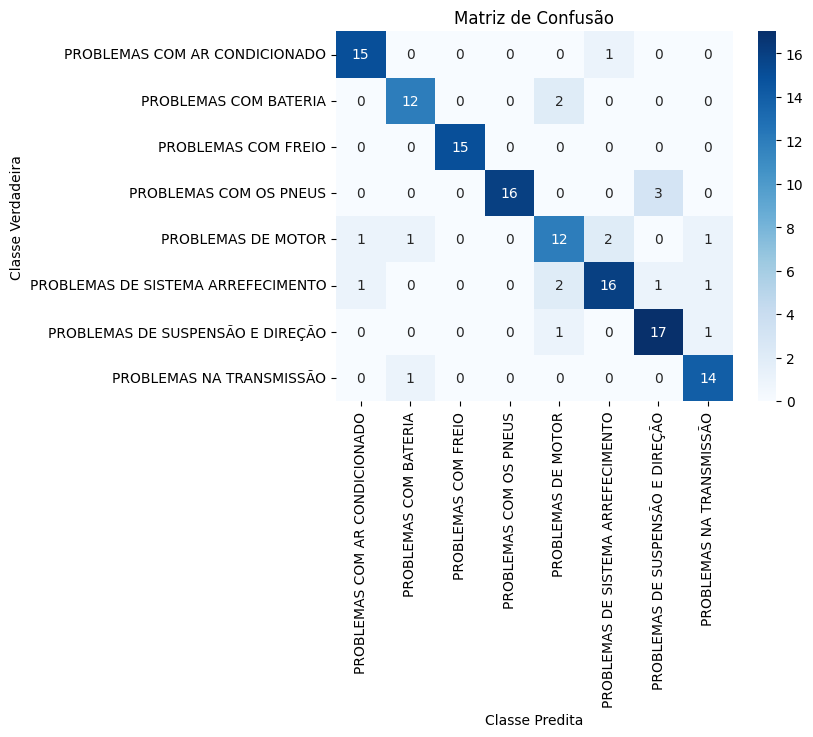

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.title('Matriz de Confusão')
plt.show()


In [ ]:
import pickle

with open('modelo_random_forest2.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('/content/drive/MyDrive/tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
!cp modelo_random_forest2.pkl /content/drive/MyDrive/